In [1]:
import pickle
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [10]:
pathToFile = '/mnt/home/jbielecki1/NEMA/'
data1 = pickle.load(open(pathToFile + 'NEMA_IQ_384str_N0_1000_COINCIDENCES_PREPARED_part04', 'rb'))
data2 = pickle.load(open(pathToFile + 'NEMA_IQ_384str_N0_1000_COINCIDENCES_PREPARED_part05', 'rb'))
data3 = pickle.load(open(pathToFile + 'NEMA_IQ_384str_N0_1000_COINCIDENCES_PREPARED_part06', 'rb'))
data = pd.concat([data1[:10000], data2[:10000], data3[:10000]])

In [11]:
# Cut params
width1 = 1050.0
height1 = 42.0
center = 180.0
width2 = 160.0
height2 = 6.5
zCut = 10.85

In [12]:
dataClass1 = data[data['class'] == 1]
dataClass2 = data[data['class'] == 2]
dataClass3 = data[data['class'] == 3]
dataClass4 = data[data['class'] == 4]

In [13]:
def ellipseY(x, width, height, center):
    return center - height*math.sqrt(1 - x**2/width**2)

In [14]:
xEllipse1 = np.arange(-width1, width1+1)
yEllipse1 = np.array([ ellipseY(el, width1, height1, center) for el in xEllipse1 ])
xEllipse2 = np.arange(-width2, width2+1)
yEllipse2 = np.array([ ellipseY(el, width2, height2, center) for el in xEllipse2 ])

In [15]:
def cutGeometry(row):
    prediction = True
    rowClass = row['class']
    
    # Check z
    if row['rZ1'] > zCut or row['rZ1'] < -zCut:
        prediction = False
        
    # Check ellipse1
    if row['dt'] < -width1 or row['dt'] > width1:
        prediction = False
    else:
        if row['deg2D'] < ellipseY(row['dt'], width1, height1, center):
            prediction = False
    
    # Check ellipse2
    if row['dt'] > -width2 and row['dt'] < width2 \
        and row['deg2D'] > ellipseY(row['dt'], width2, height2, center):
        prediction = False
    
    if prediction and row['class'] == 1:
        return 1 # TP
    elif prediction and row['class'] != 1:
        return 2 # FP
    elif ~prediction and row['class'] != 1:
        return 3 # TN
    elif ~prediction and row['class'] == 1:
        return 4 # FN

In [16]:
cuttedData = data.apply(cutGeometry, axis = 1)
pPsPredictedPositive = pd.DataFrame(pd.concat([cuttedData[cuttedData == 1], cuttedData[cuttedData == 2]]).sort_index())
dataPositive = data.iloc[list(pPsPredictedPositive.index),:]

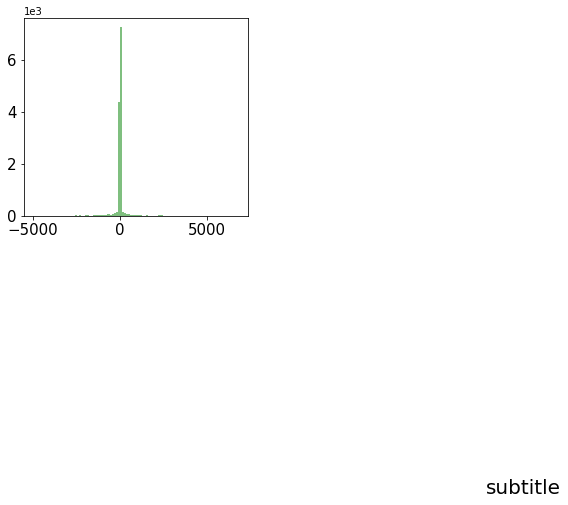

In [17]:
fig = plt.gcf()
fig.set_size_inches(18.5, 8)
fig.suptitle('subtitle', fontsize = 20, y = 0.08)
ax1 = plt.subplot(2,4,1)
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.hist(dataPositive['rZ1'], bins = 100, alpha = 0.5, color = 'green', label = 'Positive data')
ax1.tick_params(direction='out', labelsize = 15)